In [1]:
#Run if you need the FIPS (Federal Information Processing Series) code

#open file
file = open('FIPS.txt', 'r')

#read file
FIPS = file.read()

#print file
print(FIPS)

FIPS|STATE
  01|Alabama
  02|Alaska
  04|Arizona
  05|Arkansas
  06|California
  08|Colorado
  09|Connecticut
  10|Delaware
  11|District of Columbia
  12|Florida
  13|Georgia
  15|Hawaii
  16|Idaho
  17|Illinois
  18|Indiana
  19|Iowa
  20|Kansas
  21|Kentucky
  22|Louisiana
  23|Maine
  24|Maryland
  25|Massachusetts
  26|Michigan
  27|Minnesota
  28|Mississippi
  29|Missouri
  30|Montana
  31|Nebraska
  32|Nevada
  33|New Hampshire
  34|New Jersey
  35|New Mexico
  36|New York
  37|North Carolina
  38|North Dakota
  39|Ohio
  40|Oklahoma
  41|Oregon
  42|Pennsylvania
  44|Rhode Island
  45|South Carolina
  46|South Dakota
  47|Tennessee
  48|Texas
  49|Utah
  50|Vermont
  51|Virginia
  53|Washington
  54|West Virginia
  55|Wisconsin
  56|Wyoming
  60|American Samoa
  66|Guam
  69|Northern Mariana Islands
  72|Puerto Rico
  74|US Minor Outlying Islands
  78|US Virgin Islands


Enter an FIPS code:10
Done
Done
Done
Done
Done
Done
Done
Downloads Finished


C:\Users\ryanj\AppData\Local\conda\conda\envs\final\lib\site-packages\ipykernel_launcher.py:73: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



Join Complete
.prj Created
Downloaded Files Deleted
Shapefile & JSON saved in: states/FIPS


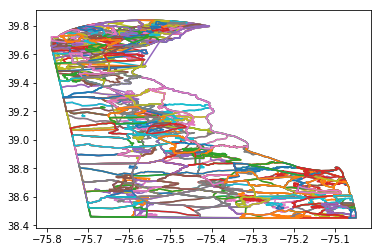

,AFFGEOID,AFFGEOID10,ALAND,ALAND10,AWATER,AWATER10,BLKGRPCE,COUNTYFP,COUNTYFP10,COUSUBFP,...,PLACENS,PUMACE10,SLDLST,SLDUST,STATEFP,STATEFP10,TRACTCE,UACE10,UATYP10,geometry
0,1500000US100030101041,,3179042.0,NaN,2863836.0,NaN,1,003,,,...,,,,,10,,010104,,,"POLYGON ((-75.471153 39.783178, -75.4701659999..."
1,1500000US100030005001,,110787.0,NaN,0.0,NaN,1,003,,,...,,,,,10,,000500,,,"POLYGON ((-75.537109 39.757683, -75.5340229999..."
2,1500000US100030029002,,278610.0,NaN,58689.0,NaN,2,003,,,...,,,,,10,,002900,,,"POLYGON ((-75.55016999999999 39.736923, -75.54..."
3,1500000US100030163012,,2835273.0,NaN,0.0,NaN,2,003,,,...,,,,,10,,016301,,,"POLYGON ((-75.683937 39.622766, -75.677983 39...."
4,1500000US100030136132,,1886743.0,NaN,0.0,NaN,2,003,,,...,,,,,10,,013613,,,"POLYGON ((-75.690551 39.74478999999999, -75.69..."


In [2]:
import requests, zipfile, io, shapefile, glob, sys, pandas, os, shutil
import geopandas as gpd
from json import dumps
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

FIPS = input('Enter an FIPS code:')

#download
url = 'http://www2.census.gov/geo/tiger/GENZ2015/shp/cb_2015_'+str(FIPS)+'_bg_500k.zip'
print('Downloading shapefile...')
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
print('Done')
#extract to folder
z.extractall(path='states/')

url = 'http://www2.census.gov/geo/tiger/GENZ2015/shp/cb_2015_'+str(FIPS)+'_county_within_ua_500k.zip'
print('Downloading shapefile...')
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
print('Done')
z.extractall(path='states/')

url = 'http://www2.census.gov/geo/tiger/GENZ2015/shp/cb_2015_'+str(FIPS)+'_cousub_500k.zip'
print('Downloading shapefile...')
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
print('Done')
z.extractall(path='states/')

url = 'http://www2.census.gov/geo/tiger/GENZ2015/shp/cb_2015_'+str(FIPS)+'_place_500k.zip'
print('Downloading shapefile...')
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
print('Done')
z.extractall(path='states/')

url = 'http://www2.census.gov/geo/tiger/GENZ2015/shp/cb_2015_'+str(FIPS)+'_puma10_500k.zip'
print('Downloading shapefile...')
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
print('Done')
z.extractall(path='states/')

url = 'http://www2.census.gov/geo/tiger/GENZ2015/shp/cb_2015_'+str(FIPS)+'_sldl_500k.zip'
print('Downloading shapefile...')
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
print('Done')
z.extractall(path='states/')

url = 'http://www2.census.gov/geo/tiger/GENZ2015/shp/cb_2015_'+str(FIPS)+'_sldu_500k.zip'
print('Downloading shapefile...')
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
print('Done')
z.extractall(path='states/')

url = 'http://www2.census.gov/geo/tiger/GENZ2015/shp/cb_2015_'+str(FIPS)+'_tract_500k.zip'
print('Downloading shapefile...')
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
print('Downloads Finished')
z.extractall(path='states/')

# join
folder = Path('states/')
shapefiles = folder.glob('*.shp')
gdf = pandas.concat([
    gpd.read_file(shp)
    for shp in shapefiles
]).pipe(gpd.GeoDataFrame)
gdf.to_file('states/FIPS/'+(FIPS)+'.shp')
print('Join Complete')

#create the .prj file
#shapefile location
root_dir = r'states/FIPS'
# projection path location
prj_path = r'NA83.prj'
#script to add the projection to each shapefile
for subdir, dirs, files in os.walk('states/FIPS'):
    for file in files:
        folder_name = os.path.basename(subdir)
        if file.endswith('shp'):
            new_file_name = file[:-4] +  '.prj'
            print ('.prj Created')
            shutil.copy(prj_path,os.path.join(root_dir,new_file_name))

#read the shapefile
reader = shapefile.Reader('states/FIPS/'+(FIPS)+'.shp')
fields = reader.fields[1:]
field_names = [field[0] for field in fields]
buffer = []
for sr in reader.shapeRecords():
    atr = dict(zip(field_names, sr.record))
    geom = sr.shape.__geo_interface__
    buffer.append(dict(type='Feature', \
                      geometry=geom, properties=atr))
#write the GeoJSON file
geojson = open('states/FIPS/'+(FIPS)+'.json', 'w')
geojson.write(dumps({'type': 'FeatureCollection',\
                    'features': buffer}, indent=2) + '\n')

#remove downloaded files
dir_name = 'states/'
remove = os.listdir(dir_name)

for item in remove:
    if item.endswith('.shp',):
        os.remove(os.path.join(dir_name, item))
    elif item.endswith('.dbf',):
        os.remove(os.path.join(dir_name, item))
    elif item.endswith('.xml',):
        os.remove(os.path.join(dir_name, item))
    elif item.endswith('.shx',):
        os.remove(os.path.join(dir_name, item))
    elif item.endswith('.cpg',):
        os.remove(os.path.join(dir_name, item))
    elif item.endswith('.prj',):
        os.remove(os.path.join(dir_name, item))
print('Downloaded Files Deleted')
print('Shapefile & JSON saved in: '+(root_dir)+'')

#print out .shp
sf = shapefile.Reader('states/FIPS/'+(FIPS)+'.shp')
plt.figure()
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)
#save .png if needed
#plt.savefig('states/FIPS/'+(FIPS)+'.png', bbox_inches='tight')
plt.show()

#add json to a dataframe
statecb = gpd.read_file('states/FIPS/'+(FIPS)+'.json')
statecb.head()